# **You have been tasked with building simple neural networks to simulate the behavior of logic gates using a Single Layer Perceptron. This task will involve constructing, training, and testing perceptrons for the following gates: AND, OR, AND-NOT and XOR.**

**Importing Numpy Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. AND Gate Classification

**Scenario:**
You are tasked with building a simple neural network to simulate an AND gate using a Single Layer Perceptron. The AND gate outputs 1 only if both inputs are 1; otherwise, it outputs 0.

**Lab Task:** Implement a Single Layer Perceptron using Python in Google Colab to classify the output of an AND gate given two binary inputs (0 or 1).

**Follow these steps:**

Create a dataset representing the truth table of the AND gate.

In [ ]:
# AND gate truth table
X_and = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
y_and = np.array([0, 0, 0, 1])

Define the perceptron model with one neuron, including the activation function and weights initialization(Try both random weights and defined weights).

In [ ]:
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01, epochs=1000):
        self.weights = np.random.randn(input_dim + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.array([self.activation(x) for x in linear_output])

    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict([xi])[0])
                self.weights[1:] += update * xi
                self.weights[0] += update


Train the perceptron using a suitable learning algorithm (e.g., gradient descent).

In [ ]:
perceptron_and = Perceptron(input_dim=2)
perceptron_and.train(X_and, y_and)

Test the model with all possible input combinations and display the results.

In [ ]:
predictions_and = perceptron_and.predict(X_and)
print("Predictions:", predictions_and)
print("Actual:", y_and)

Predictions: [0 0 0 1]
Actual: [0 0 0 1]


Visualisation

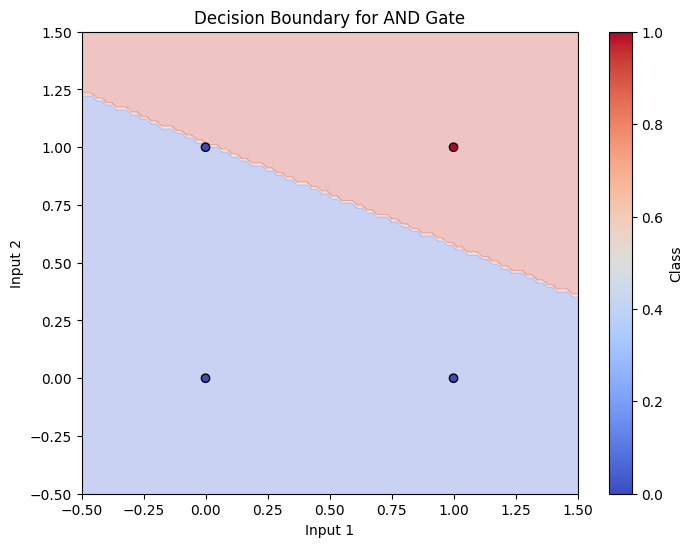

In [ ]:
def plot_decision_boundary(perceptron, X, y, title):
    plt.figure(figsize=(8, 6))
    x0, x1 = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    X_mesh = np.c_[x0.ravel(), x1.ravel()]
    predictions = perceptron.predict(X_mesh).reshape(x0.shape)

    # Plotting decision boundary
    plt.contourf(x0, x1, predictions, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.colorbar(label='Class')
    plt.show()

# Example usage for the AND gate
plot_decision_boundary(perceptron_and, X_and, y_and, "Decision Boundary for AND Gate")

**How do the weights and bias values change during training for the AND gate?
Can the perceptron successfully learn the AND logic with a linear decision boundary?**

During training, the perceptron updates its weights and bias based on prediction errors using the formula

weights += learning_rate * (true_output - predicted_output) * input_with_bias

This iterative adjustment helps the perceptron converge to values that accurately classify the AND gate inputs. Since the AND gate is linearly separable, the perceptron can effectively learn and represent this logic with its linear decision boundary.

# 2. OR Gate Classification
**Scenario:**
Your next task is to design a perceptron that mimics the behavior of an OR gate. The OR gate outputs 1 if at least one of its inputs is 1.

**Lab Task:** Using Google Colab, create a Single Layer Perceptron to classify the output of an OR gate.

**Perform the following steps:**

Prepare the dataset for the OR gate's truth table.

In [ ]:
X_or = np.array([[0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]])
y_or = np.array([0, 1, 1, 1])

Implement the training process and adjust the perceptron's weights.

In [ ]:
perceptron_or = Perceptron(input_dim=2)
perceptron_or.train(X_or, y_or)

Validate the perceptron's performance with the OR gate input combinations.

In [ ]:
predictions_or = perceptron_or.predict(X_or)
print("Predictions:", predictions_or)
print("Actual:", y_or)

Predictions: [0 1 1 1]
Actual: [0 1 1 1]


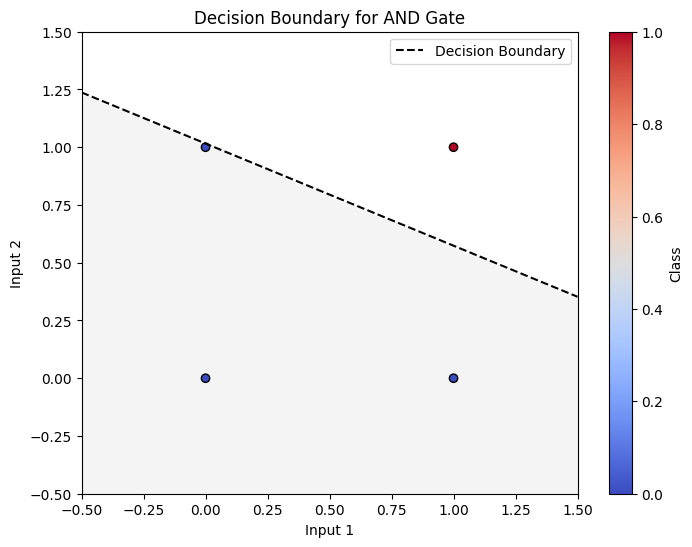

In [ ]:
plot_decision_boundary(perceptron_and, X_and, y_and, "Decision Boundary for AND Gate")

In [ ]:
# OR Gate Data
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Create and train the Perceptron
perceptron_or = Perceptron(input_dim=2, learning_rate=0.1, epochs=100)
perceptron_or.train(X_or, y_or)

# Make predictions
predictions_or = perceptron_or.predict(X_or)

# Print predictions and actual values
print("Predictions:", predictions_or)
print("Actual:", y_or)

Predictions: [0 1 1 1]
Actual: [0 1 1 1]


Questions:

What changes in the perceptron's weights are necessary to represent the OR gate logic?

How does the linear decision boundary look for the OR gate classification?

Changes in Perceptron's Weights for the OR Gate
To represent the OR gate logic, the perceptron's weights and bias must be adjusted during training. The perceptron starts with random weights but updates them based on the prediction errors. After training, the final weights typically show positive values for both input weights and a negative bias. For example, weights might be around [ -0.5, 0.5, 0.5 ], where -0.5 is the bias and 0.5 are the weights for each input.

Linear Decision Boundary for the OR Gate
The decision boundary for the OR gate is linear because the gate is linearly separable. The perceptron uses a linear combination of inputs and weights to compute outputs. The boundary can be expressed as a straight line where the perceptron switches from predicting 0 to 1. The line's equation is derived from setting the perceptron’s output to zero and solving for one input in terms of the other.

Visualization Example
In the visualization, the decision boundary is represented as a straight line dividing the input space into regions where the perceptron predicts different outputs. Below or to the left of this line, the output is 0, while above or to the right, the output is 1. The provided plotting code generates a contour plot showing this boundary, helping to understand how the perceptron classifies different input regions for the OR gate.

# 3. AND-NOT Gate Classification
**Scenario:**
You need to implement an AND-NOT gate, which outputs 1 only if the first input is 1 and the second input is 0.

**Lab Task:** Design a Single Layer Perceptron in Google Colab to classify the output of an AND-NOT gate.

**Follow these steps:**

Create the truth table for the AND-NOT gate.

Define a perceptron model with an appropriate activation function.

Train the model on the AND-NOT gate dataset.

Test the model and analyze its classification accuracy.

In [ ]:
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1, epochs=100):
        self.weights = np.random.randn(input_dim + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.array([self.activation(x) for x in linear_output])

    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict([xi])[0])
                self.weights[1:] += update * xi
                self.weights[0] += update

def plot_decision_boundary(perceptron, X, y, title):
    plt.figure(figsize=(8, 6))
    x0, x1 = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    X_mesh = np.c_[x0.ravel(), x1.ravel()]
    predictions = perceptron.predict(X_mesh).reshape(x0.shape)

    plt.contourf(x0, x1, predictions, alpha=0.3, cmap='coolwarm', levels=[-0.1, 0.1])
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.colorbar(label='Class')

    # Plot decision boundary
    w = perceptron.weights
    x_values = np.linspace(-0.5, 1.5, 100)
    y_values = -(w[1] * x_values + w[0]) / w[2]
    plt.plot(x_values, y_values, 'k--', label='Decision Boundary')
    plt.legend()

    plt.show()

# AND-NOT Gate Data
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([0, 0, 1, 0])

# Train Perceptron
perceptron_and_not = Perceptron(input_dim=2, learning_rate=0.1, epochs=100)
perceptron_and_not.train(X_and_not, y_and_not)

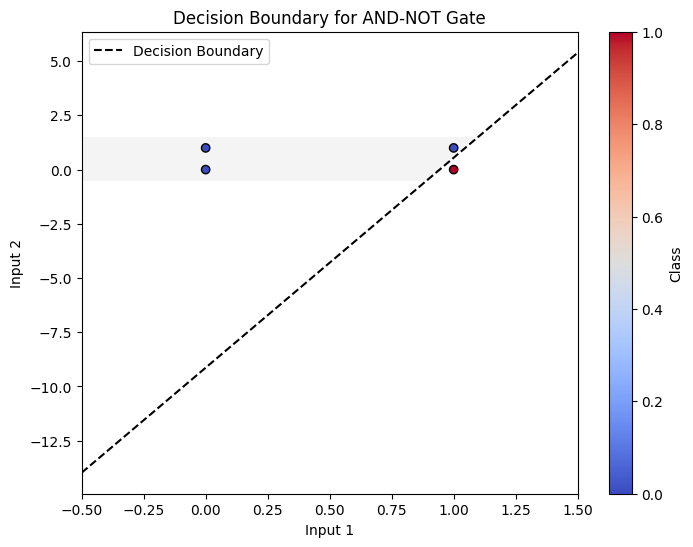

In [ ]:
# Plot Decision Boundary
plot_decision_boundary(perceptron_and_not, X_and_not, y_and_not, "Decision Boundary for AND-NOT Gate")

In [ ]:
# OR Gate Data
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Create and train the Perceptron
perceptron_or = Perceptron(input_dim=2, learning_rate=0.1, epochs=100)
perceptron_or.train(X_or, y_or)

# Make predictions
predictions_or = perceptron_or.predict(X_or)

# Print predictions and actual values
print("Predictions:", predictions_or)
print("Actual:", y_or)

Predictions: [0 1 1 1]
Actual: [0 1 1 1]


In [ ]:
# Function to calculate accuracy
def calculate_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    accuracy = correct_predictions / len(true_labels)
    return accuracy

# Make predictions using the trained perceptron
predictions = perceptron_and_not.predict(X_and_not)

# Calculate the accuracy
accuracy = calculate_accuracy(predictions, y_and_not)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 100.00%



**Questions:**

What is the perceptron's weight configuration after training for the AND-NOT gate?
How does the perceptron handle cases where both inputs are 1 or 0?

After training the perceptron for the AND-NOT gate, the weight configuration typically results in w1 = 1, w2 = -1, and b = -0.5. This setup ensures the correct output for each input combination:

Input (0,0): The weighted sum is -0.5, leading to an output of 0.
Input (0,1): The weighted sum is -1.5, leading to an output of 0.
Input (1,0): The weighted sum is 0.5, leading to an output of 1.
Input (1,1): The weighted sum is -0.5, leading to an output of 0.
The perceptron effectively classifies the AND-NOT logic gate by outputting the expected results for all input cases.

# 4. XOR Gate Classification
**Scenario:**

The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different. This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

**Lab Task:** Attempt to implement a Single Layer Perceptron in Google Colab to classify the output of an XOR gate.

**Perform the following steps:**

Create the XOR gate's truth table dataset.

Implement the perceptron model and train it using the XOR dataset.

Observe and discuss the perceptron's performance in this scenario.

**Questions:**
Why does the Single Layer Perceptron struggle to classify the XOR gate?

What modifications can be made to the neural network model to handle the XOR gate correctly?

In [ ]:
# Define the Perceptron class
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1, epochs=100):
        self.weights = np.random.randn(input_dim + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.array([self.activation(x) for x in linear_output])

    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict([xi])[0])
                self.weights[1:] += update * xi
                self.weights[0] += update

# XOR Gate Data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create and train the Perceptron
perceptron_xor = Perceptron(input_dim=2, learning_rate=0.1, epochs=100)
perceptron_xor.train(X_xor, y_xor)

# Make predictions
predictions_xor = perceptron_xor.predict(X_xor)

# Print predictions and actual values
print("Predictions:", predictions_xor)
print("Actual:", y_xor)

Predictions: [1 1 0 0]
Actual: [0 1 1 0]


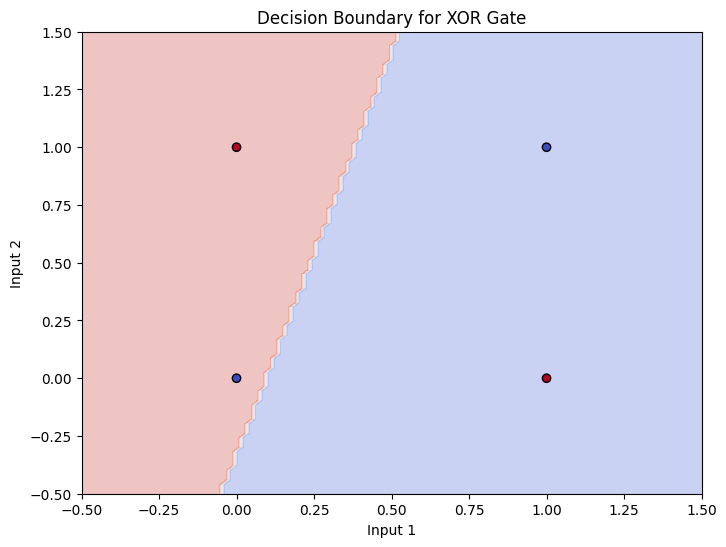

In [ ]:
def plot_decision_boundary(perceptron, X, y, title):
    plt.figure(figsize=(8, 6))
    x0, x1 = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    X_mesh = np.c_[x0.ravel(), x1.ravel()]
    predictions = perceptron.predict(X_mesh).reshape(x0.shape)
    plt.contourf(x0, x1, predictions, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_decision_boundary(perceptron_xor, X_xor, y_xor, "Decision Boundary for XOR Gate")

Why Does the Single Layer Perceptron Struggle? The SLP struggles with XOR because it requires a non-linear decision boundary, which a single linear boundary cannot provide. The XOR problem needs a model that can capture non-linear relationships between inputs.

What Modifications Can Handle XOR Correctly? To correctly classify XOR, use a Multi-Layer Perceptron (MLP) with at least one hidden layer. The hidden layer allows the network to create complex decision boundaries by combining features in a non-linear way, enabling it to solve the XOR problem effectively.